## Code 1

#### Importing the libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt
import utils
import models

## Code 2

#### Checking if CUDA is available or not

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


## Code 3

In [16]:
## Shifted this code to utils file
## Here we have defined train and test transforms

## Code 4

#### Downloading the MNIST dataset of train and test

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=utils.train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=utils.test_transforms)

## Code 5

#### Defining batch size and loading test and train loader

In [5]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

## Code 6

#### Visualizing the some samples of train loader dataset

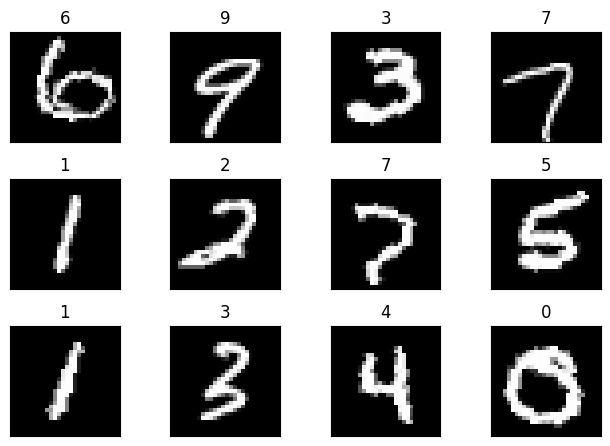

In [6]:
batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Code 7

In [7]:
## Sfhited this code to models.py file

## Code 8

In [8]:
### Shifted this code to utils file

## Code 9

In [9]:
from tqdm import tqdm

## Shifted this code to utils.py file

## Code 10

#### Define the epochs,optimizer,learning rate and finally running our model

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = models.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(model, device, train_loader, optimizer, criterion)
  utils.test(model, device, test_loader, criterion)
  scheduler.step()

D:\Softwares\anaconda3\envs\pytorch-gpu\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.0495 Batch_id=468 Accuracy=86.95: 100%|██████████| 469/469 [00:32<00:00, 14.37it/s]


Test set: Average loss: 0.0556, Accuracy: 9831/10000 (98.31%)

Epoch 2


Train: Loss=0.0271 Batch_id=468 Accuracy=97.32: 100%|██████████| 469/469 [00:32<00:00, 14.50it/s]


Test set: Average loss: 0.0501, Accuracy: 9836/10000 (98.36%)

Epoch 3


Train: Loss=0.1043 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:31<00:00, 14.67it/s]


Test set: Average loss: 0.0370, Accuracy: 9875/10000 (98.75%)

Epoch 4


Train: Loss=0.0775 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:32<00:00, 14.47it/s]


Test set: Average loss: 0.0242, Accuracy: 9911/10000 (99.11%)

Epoch 5


Train: Loss=0.0031 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:32<00:00, 14.51it/s]


Test set: Average loss: 0.0273, Accuracy: 9909/10000 (99.09%)

Epoch 6


Train: Loss=0.0192 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:32<00:00, 14.52it/s]


Test set: Average loss: 0.0264, Accuracy: 9909/10000 (99.09%)

Epoch 7


Train: Loss=0.0289 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:33<00:00, 14.13it/s]


Test set: Average loss: 0.0236, Accuracy: 9925/10000 (99.25%)

Epoch 8


Train: Loss=0.0816 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:32<00:00, 14.33it/s]


Test set: Average loss: 0.0216, Accuracy: 9928/10000 (99.28%)

Epoch 9


Train: Loss=0.0531 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:32<00:00, 14.43it/s]


Test set: Average loss: 0.0199, Accuracy: 9935/10000 (99.35%)

Epoch 10


Train: Loss=0.0030 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:32<00:00, 14.43it/s]


Test set: Average loss: 0.0224, Accuracy: 9932/10000 (99.32%)

Epoch 11


Train: Loss=0.0144 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:32<00:00, 14.55it/s]


Test set: Average loss: 0.0225, Accuracy: 9925/10000 (99.25%)

Epoch 12


Train: Loss=0.0893 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:32<00:00, 14.36it/s]


Test set: Average loss: 0.0211, Accuracy: 9931/10000 (99.31%)

Epoch 13


Train: Loss=0.0041 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:32<00:00, 14.48it/s]


Test set: Average loss: 0.0201, Accuracy: 9934/10000 (99.34%)

Epoch 14


Train: Loss=0.0160 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:32<00:00, 14.46it/s]


Test set: Average loss: 0.0171, Accuracy: 9947/10000 (99.47%)

Epoch 15


Train: Loss=0.0166 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:32<00:00, 14.45it/s]


Test set: Average loss: 0.0248, Accuracy: 9932/10000 (99.32%)

Epoch 16


Train: Loss=0.0010 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:32<00:00, 14.51it/s]


Test set: Average loss: 0.0173, Accuracy: 9947/10000 (99.47%)

Epoch 17


Train: Loss=0.0101 Batch_id=468 Accuracy=99.64: 100%|██████████| 469/469 [00:32<00:00, 14.52it/s]


Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

Epoch 18


Train: Loss=0.0063 Batch_id=468 Accuracy=99.65: 100%|██████████| 469/469 [00:32<00:00, 14.53it/s]


Test set: Average loss: 0.0170, Accuracy: 9947/10000 (99.47%)

Epoch 19


Train: Loss=0.0318 Batch_id=468 Accuracy=99.65: 100%|██████████| 469/469 [00:32<00:00, 14.61it/s]


Test set: Average loss: 0.0169, Accuracy: 9948/10000 (99.48%)

Epoch 20


Train: Loss=0.0019 Batch_id=468 Accuracy=99.66: 100%|██████████| 469/469 [00:32<00:00, 14.52it/s]


Test set: Average loss: 0.0168, Accuracy: 9947/10000 (99.47%)



## Code 11

#### Visualizing the training and test loss and training and testing accuracy

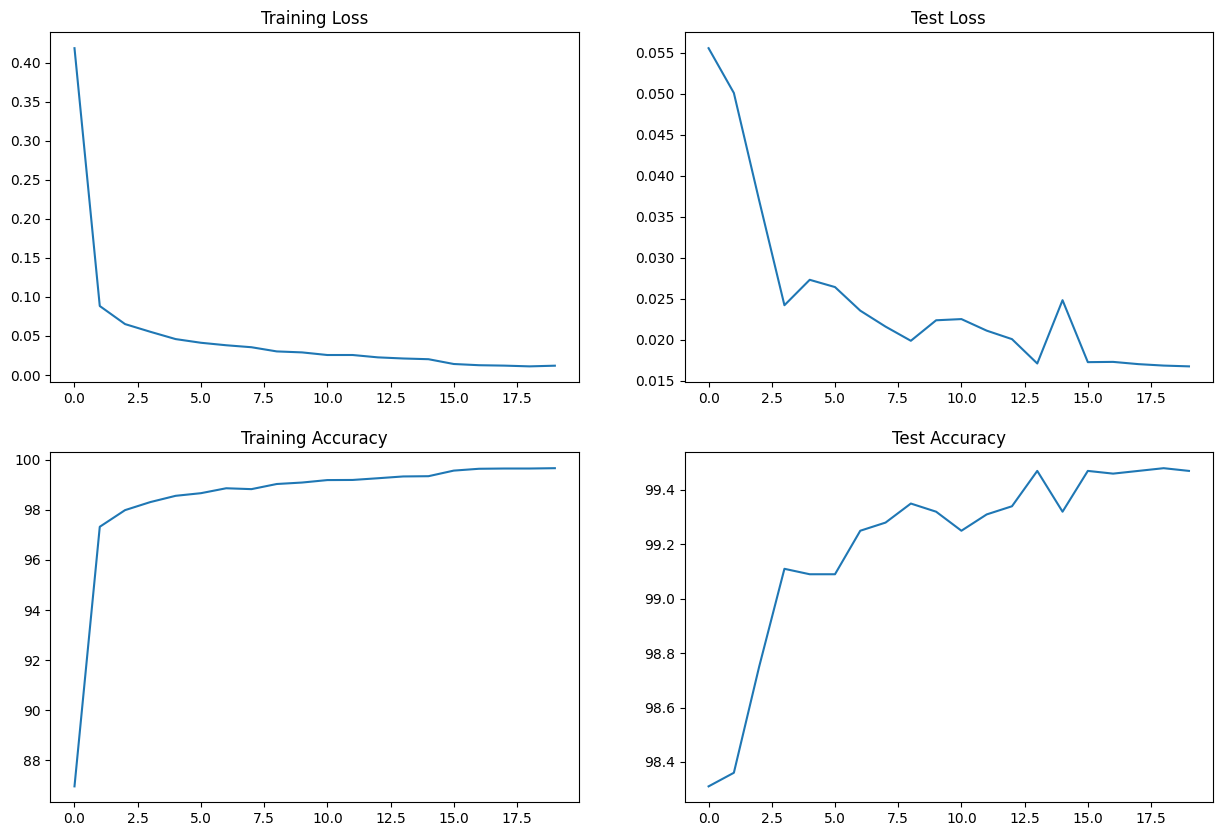

In [12]:
# shifted this code to utils
utils.visualize_loss_accuracy()

#### Printing the model summary to see its parameters

In [15]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------
